In [282]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import pandas as pd
from models import *
from plot_utils import *

import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (10, 6.5)
plt.rcParams['font.size'] = 24
plt.rcParams['font.weight'] = 500
plt.rcParams['axes.titlesize'] = 27
plt.rcParams['axes.labelsize'] = 23
plt.rcParams['xtick.labelsize'] = 21
plt.rcParams['ytick.labelsize'] = 21
plt.rcParams['legend.fontsize'] = 23
plt.rcParams['lines.markersize'] = 10
plt.rcParams['lines.linewidth'] = 4

sns.set_style('ticks')
sns.set_palette('Paired', 10)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [283]:
simdex_netflix_df = pd.read_csv('timing-results/netflix-simdex-timing.csv')
lemp_netflix_df = pd.read_csv('timing-results/netflix-lemp-timing.csv')
blocked_mm_netflix_df = pd.read_csv('timing-results/netflix-blocked_mm-timing.csv')

simdex_kdd_df = pd.read_csv('timing-results/kdd-simdex-timing.csv')
lemp_kdd_df = pd.read_csv('timing-results/kdd-lemp-timing.csv')
blocked_mm_kdd_df = pd.read_csv('timing-results/kdd-blocked_mm-timing.csv')

simdex_r2_df = pd.read_csv('timing-results/r2-simdex-timing.csv')
lemp_r2_df = pd.read_csv('timing-results/r2-lemp-timing.csv')
blocked_mm_r2_df = pd.read_csv('timing-results/r2-blocked_mm-timing.csv')

simdex_interpolation_df = pd.read_csv('timing-results/interpolation-simdex.csv')
lemp_interpolation_df = pd.read_csv('timing-results/interpolation-lemp.csv')
blocked_mm_interpolation_df = pd.read_csv('timing-results/interpolation-blocked_mm.csv')

simdex_df = pd.concat([simdex_netflix_df, simdex_kdd_df, simdex_r2_df])
lemp_df = pd.concat([lemp_netflix_df, lemp_kdd_df, lemp_r2_df])
blocked_mm_df = pd.concat([blocked_mm_netflix_df, blocked_mm_kdd_df, blocked_mm_r2_df])

In [ ]:
f_u_plots(simdex_df, lemp_df, blocked_mm_df, GOLD_STANDARD_MODELS)

In [ ]:
simdex_netflix_df.sort_values(by='comp_time').groupby(
        ['model', 'K'], as_index=False).first().drop(['num_threads','num_latent_factors',
                                                      'batch_size','sample_percentage','num_iters'], axis=1)

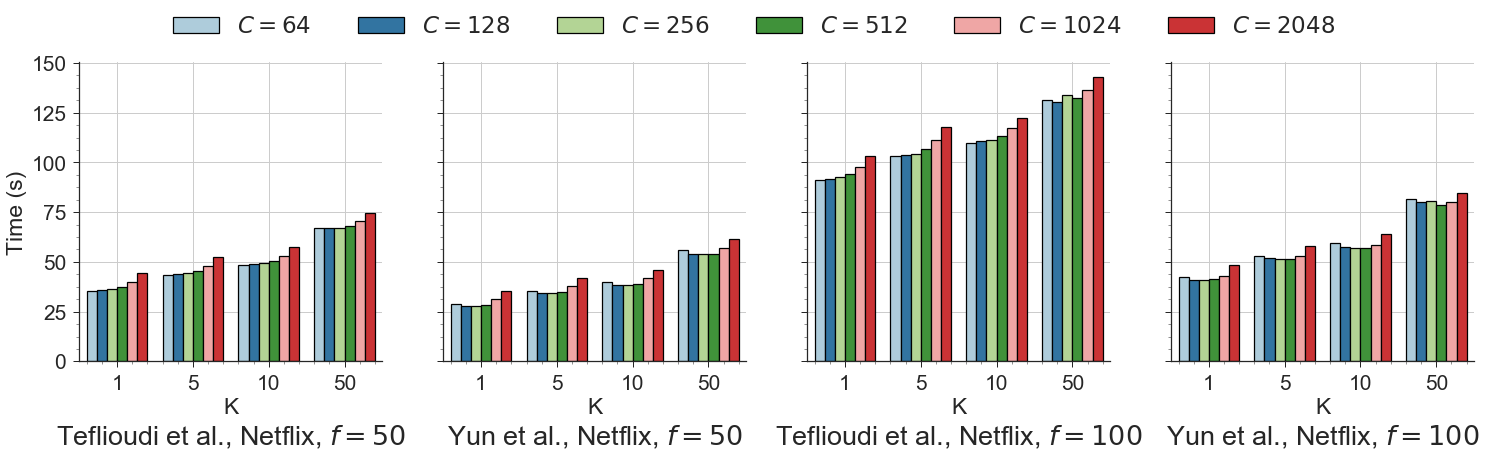

In [284]:
num_clusters_vs_runtime(simdex_netflix_df, NETFLIX_GOLD_STANDARD_MODELS, figsize=(25, 5.5), y_title=-0.3,
                        bbox_to_anchor=(0,0,1,1.05))

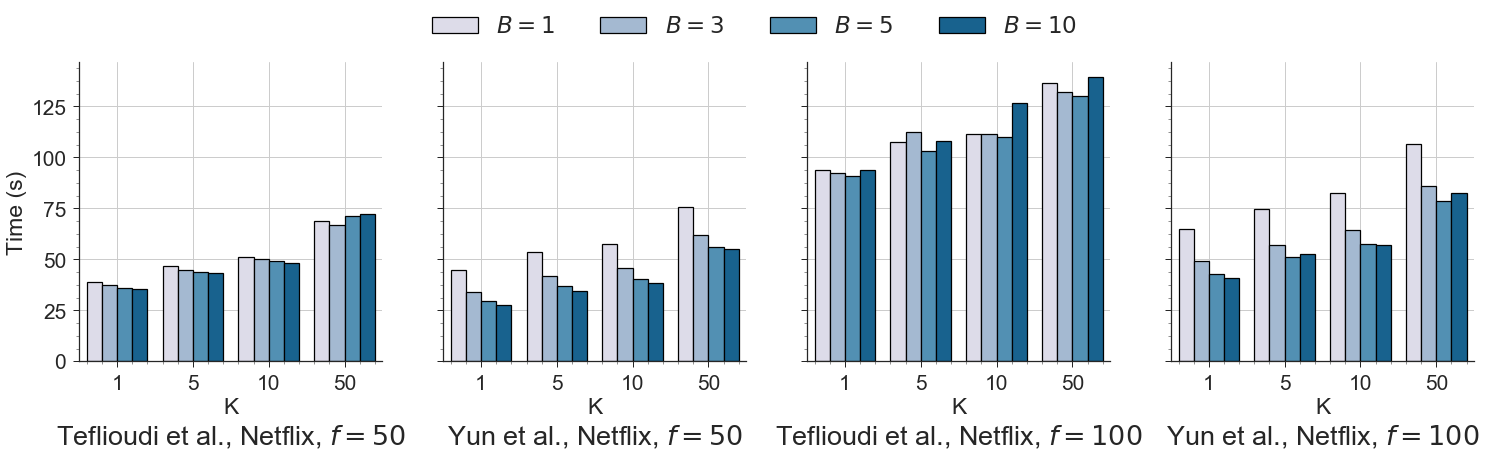

In [285]:
sns.set_palette('PuBu', 4)
num_bins_vs_runtime(simdex_netflix_df, NETFLIX_GOLD_STANDARD_MODELS, figsize=(25, 5.5), bbox_to_anchor=(0, 0, 1, 1.05),
                    y_title=-0.3)
sns.set_palette('Paired', 10)

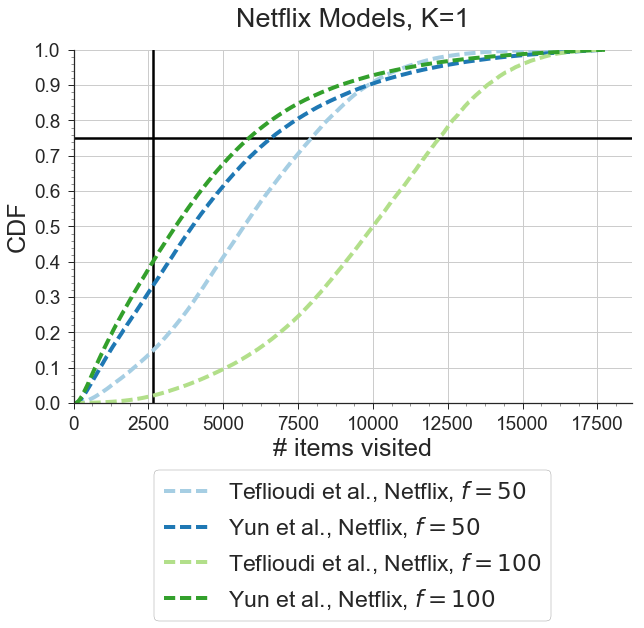

In [152]:
decision_rule(simdex_netflix_df, blocked_mm_netflix_df, NETFLIX_GOLD_STANDARD_MODELS, 1,
              x_line=17770*0.15, y_line=0.75, column='num_items_visited', csv_dir='user-stats/K-1',
              xlabel='# items visited', fname='netflix-items-visited-k-1', title='Netflix Models, K=1')

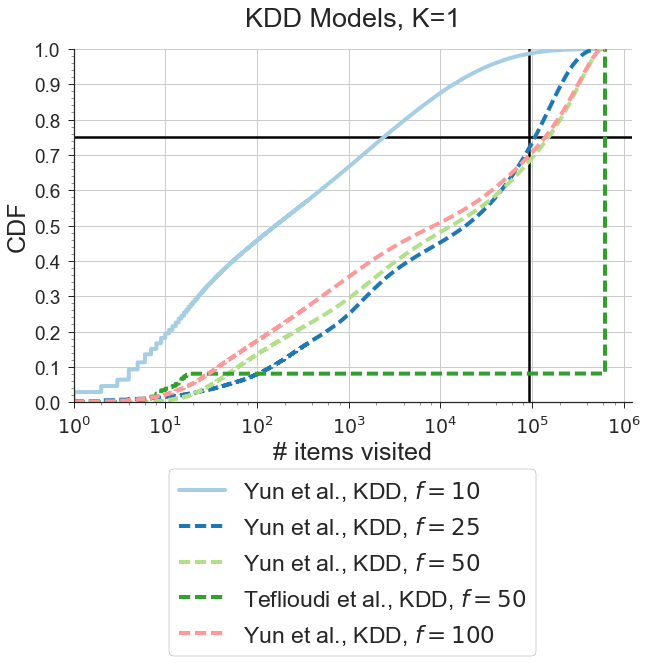

In [153]:
decision_rule(simdex_kdd_df, blocked_mm_kdd_df, KDD_GOLD_STANDARD_MODELS, 1, x_line=624961*0.15, y_line=0.75,
              column='num_items_visited', csv_dir='user-stats/K-1', xlabel='# items visited', log=True,
              fname='kdd-items-visited-k-1', title='KDD Models, K=1')

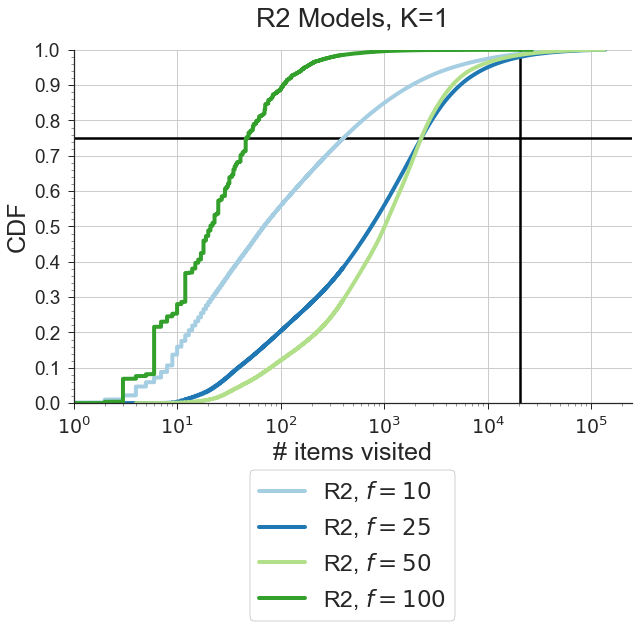

In [154]:
decision_rule(simdex_r2_df, blocked_mm_r2_df, R2_GOLD_STANDARD_MODELS, 1, x_line=136736*0.15, y_line=0.75,
              column='num_items_visited', csv_dir='user-stats/K-1', xlabel='# items visited', log=True,
              fname='r2-items-visited-k-1', title='R2 Models, K=1')

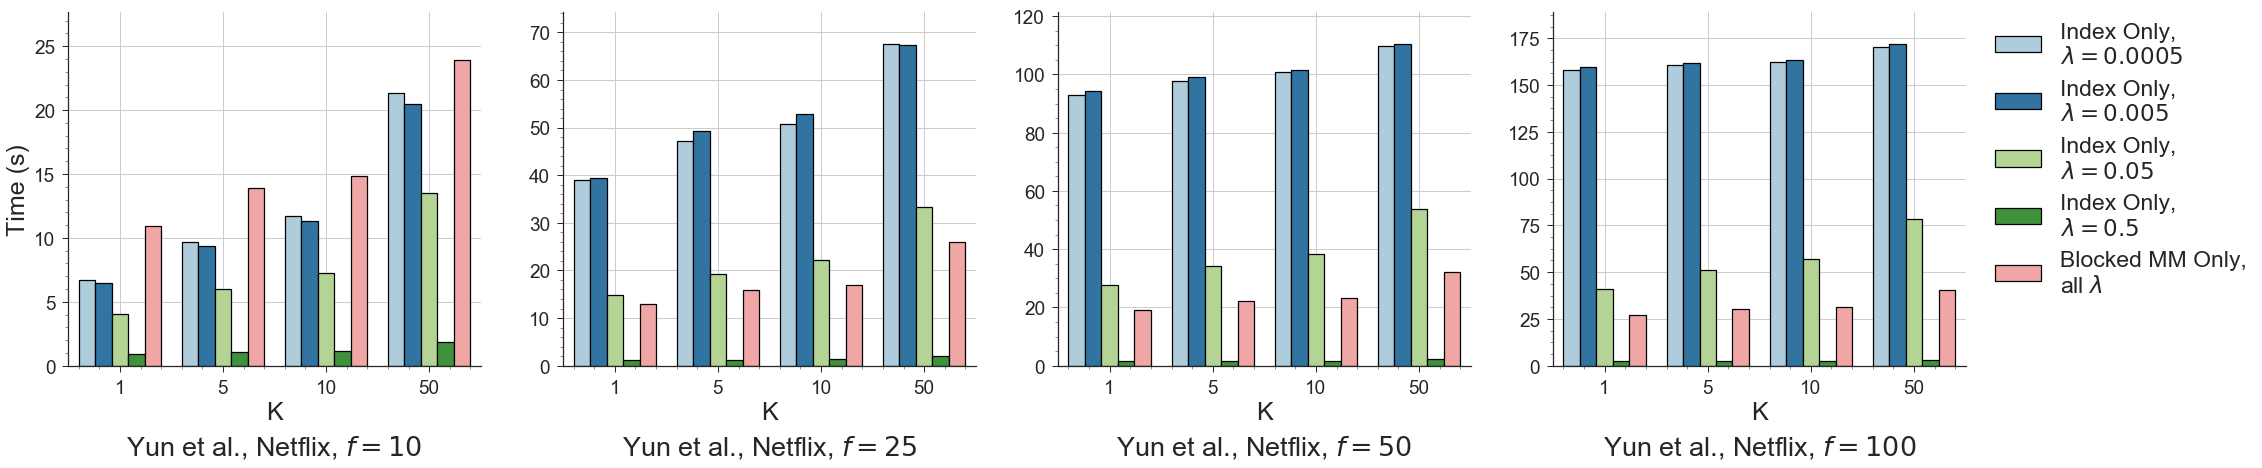

In [108]:
reg_vs_runtime(simdex_netflix_df, blocked_mm_netflix_df,
               ['nomad-Netflix-10', 'nomad-Netflix-25', 'nomad-Netflix-50', 'nomad-Netflix-100'],
               NETFLIX_REGS, fname='Netflix', nrows=1, figsize=(34, 6.5), y_title=-0.27)

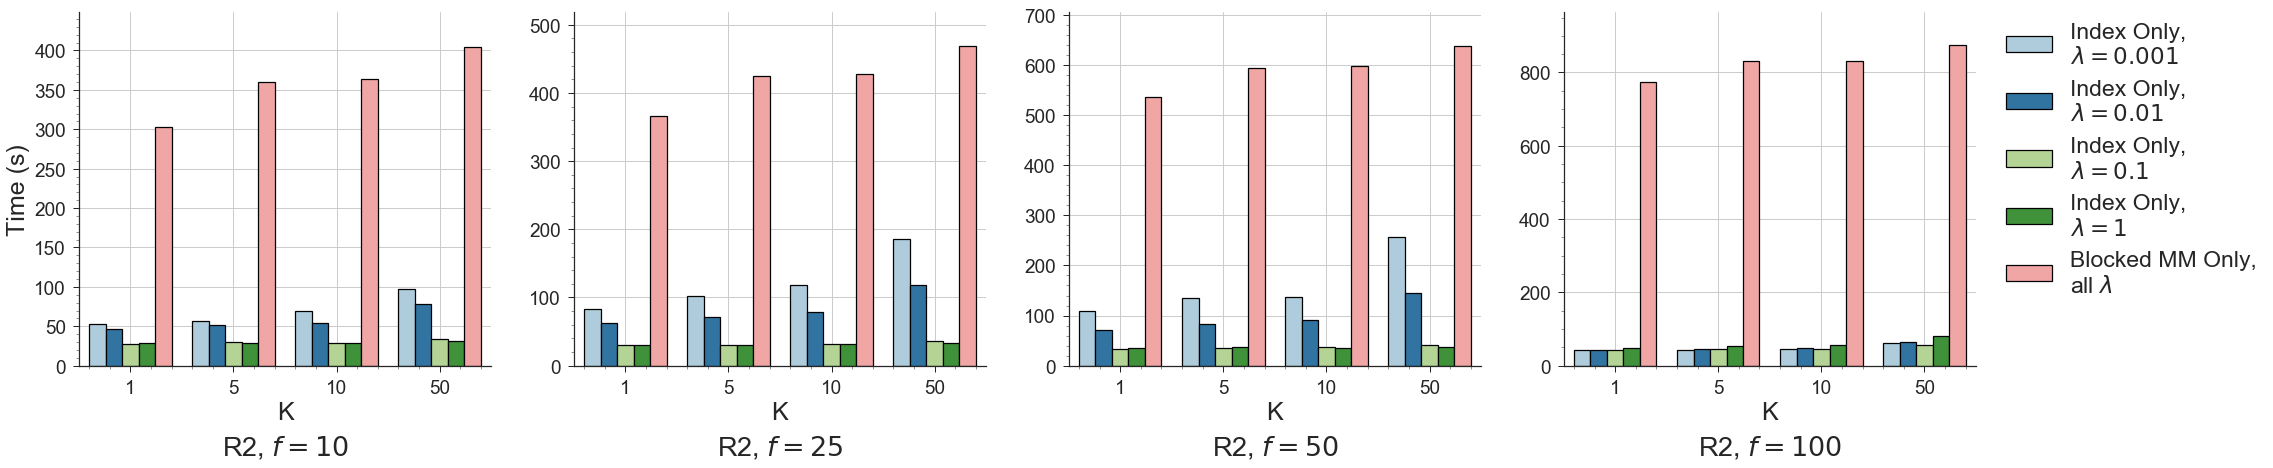

In [109]:
reg_vs_runtime(simdex_r2_df, blocked_mm_r2_df,
               ['nomad-R2-10', 'nomad-R2-25', 'nomad-R2-50', 'nomad-R2-100'], R2_REGS, fname='R2', nrows=1,
               figsize=(34, 6.5), y_title=-0.27)

1.78943004687 476237
1.69989317637 478902
47.2613429024 1000786
95.337538883 999678
16.8601154617 1821133


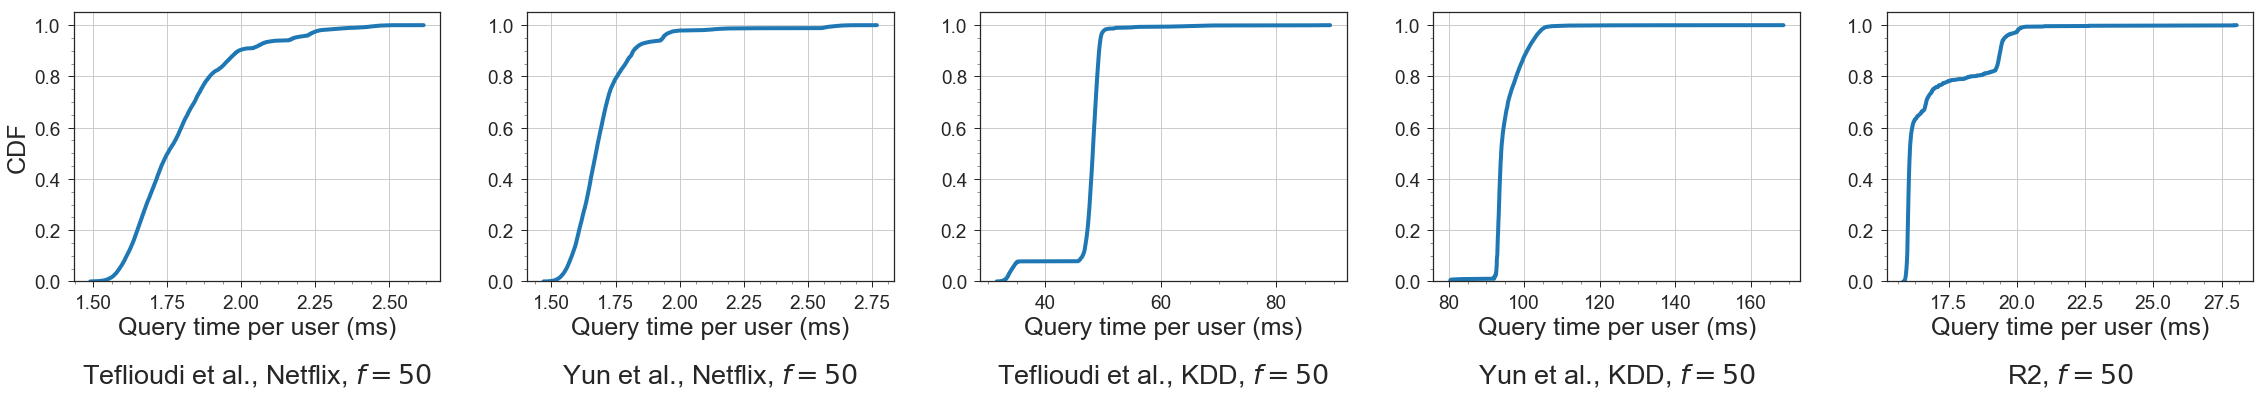

In [94]:
point_query_time(GOLD_STANDARD_MODELS, figsize=(32, 6.5), y_title=-0.4)

In [ ]:
dataset_size_vs_runtime(simdex_interpolation_df, lemp_interpolation_df, blocked_mm_interpolation_df, 'users')
dataset_size_vs_runtime(simdex_interpolation_df, lemp_interpolation_df, blocked_mm_interpolation_df, 'items')